# Setting Up: Installing Libraries

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration 

In [ ]:
dt= pd.read_csv('/content/drive/MyDrive/file/tweet_emotions.csv')

In [ ]:
dt[dt['sentiment']=="empty"]['sentiment'].value_counts()

empty    827
Name: sentiment, dtype: int64

In [ ]:
dt.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
dt['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [ ]:
dt['sentiment'].replace('empty', np.nan, inplace=True)


In [ ]:
dt.dropna(subset=['sentiment'], inplace=True)

In [ ]:
dt['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
dt

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
dt= dt.drop('tweet_id', axis=1)

In [ ]:
dt

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
label= dt['sentiment'].unique
label

<bound method Series.unique of 1           sadness
2           sadness
3        enthusiasm
4           neutral
5             worry
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 39173, dtype: object>

In [ ]:
lb= dt['sentiment'].tolist()
leng= len(lb)

In [ ]:
dt['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

## Data Visualization

In [ ]:
dtf= {'neutral': 8638,'worry':8459,'happiness':5209,'sadness':5165,'love':3842,'surprise':2187,'fun':1776,'relief':1526,'hate':1323,'enthusiasm': 759,'boredom': 179,'anger':110}

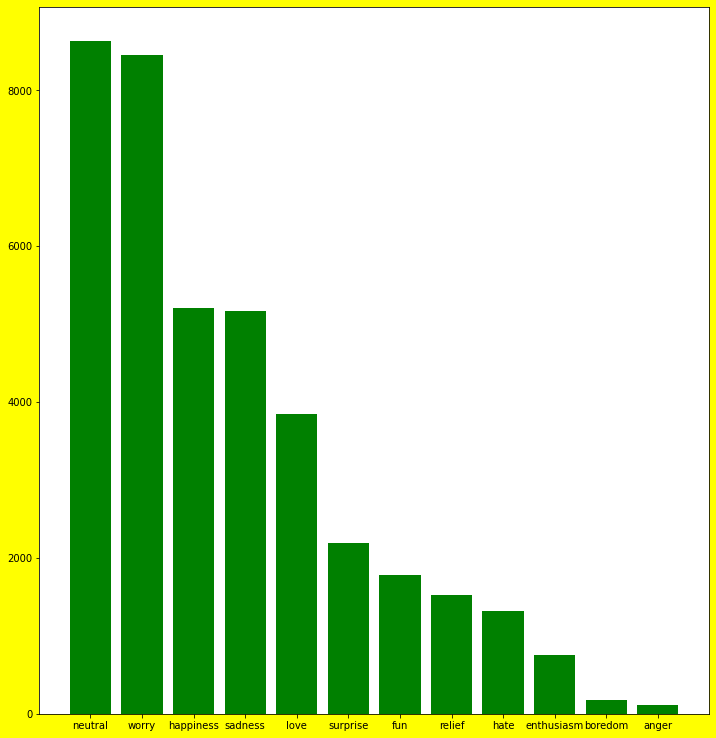

In [ ]:
plt.figure(figsize=(12,13),facecolor='yellow')
plt.bar(list(dtf.keys()), dtf.values(), color='g')
plt.show()

### Text Preprocessing

In [ ]:
stop_words = stopwords.words('english')
dt['content'] = dt['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [ ]:
dt

,sentiment,content
1,sadness,Layin n bed headache ughhhh...waitin call...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants hang friends SOON!
4,neutral,@dannycastillo We want trade someone Houston t...
5,worry,Re-pinging @ghostridah14: go prom? BC bf like ...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All love
39997,love,"Happy Mother's Day mommies there, woman man lo..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP...


In [ ]:
dt['content'] = dt['content'].apply(nfx.remove_userhandles)

dt['content']= dt['content'].apply(nfx.remove_puncts)


In [ ]:
dt

,sentiment,content
1,sadness,Layin n bed headache ughhhhwaitin call
2,sadness,Funeral ceremonygloomy friday
3,enthusiasm,wants hang friends SOON
4,neutral,We want trade someone Houston tickets one will
5,worry,Repinging go prom BC bf like friends
...,...,...
39995,neutral,
39996,love,Happy Mothers Day All love
39997,love,Happy Mothers Day mommies there woman man long...
39998,happiness,WASSUP BEAUTIFUL FOLLOW ME PEEP OUT MY NEW H...


In [ ]:
dt['sentiment'].replace('hate','anger', inplace=True)
dt['sentiment'].replace('enthusiasm','fun', inplace=True)
dt['sentiment'].replace('boredom', 'neutral', inplace=True)
dt['sentiment'].replace('relief', 'happiness', inplace=True)
dt['sentiment'].replace('fun', 'happiness', inplace=True)

In [ ]:
dt['sentiment'].value_counts()

happiness    9270
neutral      8817
worry        8459
sadness      5165
love         3842
surprise     2187
anger        1433
Name: sentiment, dtype: int64

In [ ]:
dt['sentiment'].replace('neutral', np.nan, inplace=True)
dt.dropna(subset=['sentiment'], inplace=True)

## Preparing data for training

In [ ]:
X= dt['content'].values
y=pd.factorize(dt['sentiment'].values)[0]

In [ ]:
y.shape

(30356,)

In [ ]:
X.shape

(30356,)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state =0)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
cv= TfidfVectorizer()
X_train= cv.fit_transform(X_train)


In [ ]:
X_train.shape

(21249, 24636)

In [ ]:
y_train.shape

(21249,)

In [ ]:
X_test= cv.transform(X_test)

### Support Vector Machine 

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

### Multinomial Naive Bayes

In [ ]:
gnb = MultinomialNB()
gnb.fit(X_train.toarray(),y_train)
pred= gnb.score(X_test.toarray(),y_test)

In [ ]:
pred
pred2= rbf.score(X_test.toarray(),y_test)
pred3= poly.score(X_test.toarray(),y_test)

### Prediction Accuracy of SVM on TEST data

In [ ]:
pred3

0.41078291424179203

## Prediction accuracy of Multinomial Naive Bayes on Test Data

In [ ]:
pred

0.4203360052706709

## Random Forest Classifier
## Accuracy on Test data

In [ ]:
from sklearn import ensemble
from sklearn import metrics

rf = ensemble.RandomForestClassifier(100)
rf.fit(X_train.toarray(),y_train)
pred = rf.predict(X_test.toarray())
score = metrics.accuracy_score(pred,y_test)
print(score)

0.4424069397167014
